In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import IPython.display as display
from __future__ import division
%matplotlib inline

In [42]:
data=pd.read_csv('/home/ashwin/Downloads/'
                 'climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByMajorCity.csv')
data['year']=pd.DatetimeIndex(pd.to_datetime(data['dt'])).year
data['month']=pd.DatetimeIndex(pd.to_datetime(data['dt'])).month

data=data[data['City']=='Los Angeles']
data=data[data['month']==10]

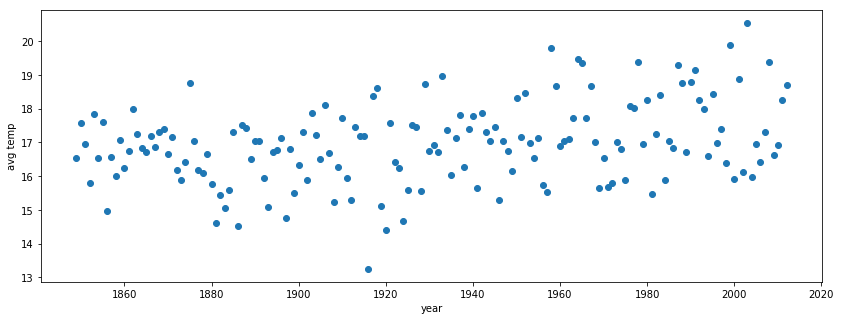

In [43]:
points=data.as_matrix(['year','AverageTemperature'])
f,ax=plt.subplots(figsize=(14,5))
ax.set_xlabel('year')
ax.set_ylabel('avg temp')
plt.scatter( points[:,0],points[:,1])
plt.show()

In [44]:
def computing_error(m,b,point):
    total_error=0.0
    for i in range(0,len(point)):
        x=point[i,0]
        y=point[i,1]
        total_error+=(y-(m*x+b))**2
        
    return total_error

In [44]:
def step_gradient(m_gradient,b_gradient
                  ,point,lam,regularizer,learning_rate):
    m=m_gradient
    b=b_gradient
    n=len(point)
    for i in range(0,n):
        x=point[i,0]
        y=point[i,1]
        if(regularizer=='l1'):
            m+=float((lam/(2*n)-(x/n)*(y-(m*x+b))))
        elif(regularizer=='l2'):
            m+=float(((lam/n)*m-(x/n)*(y-(m*x+b))))
        else:
            m+=-(x/n)*(y-(m*x+b))
        b+=-(1/n)*(y-(m*x)+b)
    new_m=m-(learning_rate*m)
    new_b=b-(learning_rate*b)
    return [new_m,new_b]

In [46]:
def gradient_decent_runner(m_gradient,b_gradient,point
                           ,lam,regularizer,learning_rate,n_itr):
    m=m_gradient
    b=b_gradient
    for i in range(0,n_itr):
        m,b=step_gradient(m,b,np.array(points)
                           ,lam,regularizer,learning_rate)
        if i % 100 == 0:
            print('Iteration {}, b:{}, m:{}, error:{}'.format(i, b, m, computing_error(m,b, point)))
    print '------',m,b
    return m,b

In [47]:
def run(lr, num_iter, lam, regularizer=None):
    learning_rate = lr
    initial_b = 0.0 # initial y-intercept guess
    initial_m = 0.0 # initial slope guess
    num_iterations = num_iter
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, computing_error(initial_m,initial_b, points)))
    print("Running...")
    m, b = gradient_decent_runner( initial_m,initial_b,points, lam,regularizer,learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, computing_error(m,b, points)))
    return b, m

In [48]:
def predict(b, m, x_values):
    predicted_y = list()
    for x in x_values:
        y = m * x + b
        predicted_y.append(y)
    return predicted_y

In [57]:
# Hyperparameters
learning_rate = 0.0000001
iterations = 1
lamb = 500

# Linear Regression with L1 
b1, m1 = run(learning_rate, iterations, lamb, 'l1')
print b1,m1
# Linear Regression with L2 
#b2, m2 = run(learning_rate, iterations, lamb, 'l2')

# Linear Regression without Regularization
#b3, m3 = run(learning_rate, iterations, lamb)

Starting gradient descent at b = 0.0, m = 0.0, error = 47493.755808
Running...
Iteration 0, b:nan, m:nan, error:nan
------ nan nan
After 1 iterations b = nan, m = nan, error = nan
nan nan


/home/ashwin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
/home/ashwin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/ashwin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


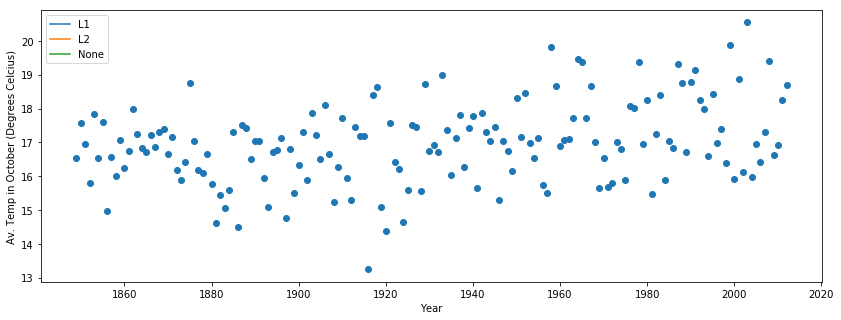

In [12]:
f, ax = plt.subplots(figsize=(14, 5))
ax.set_xlabel('Year')
ax.set_ylabel('Av. Temp in October (Degrees Celcius)')
plt.plot(points[:,0], predict(b1, m1, points[:,0]), label='L1')
plt.plot(points[:,0], predict(b2, m2, points[:,0]), label='L2')
plt.plot(points[:,0], predict(b3, m3, points[:,0]), label='None')
plt.scatter(points[:,0], points[:,1])
plt.legend()
plt.show()

In [13]:
temp = predict(b1,m1, [2017, 2050, 2100])

In [14]:
temp